### 1  Importation

In [385]:
import pandas as pd
import numpy as np
import pickle
import plotly.express as px
import time
import requests

In [386]:
# Replace YOUR_API_KEY with your actual API key
api_key = "06af3e1b654bb9481c777bde394b620b"

# Set the base URL for the TMDB API
base_url = 'https://api.themoviedb.org/3/'

# Set the parameters for the API request
params = {
    'api_key': api_key,
    'language': 'en-US',
    'include_adult': 'false',
    'sort_by': 'primary_release_date.asc',
    'primary_release_date.gte': '2000-01-01',
    'primary_release_date.lte': '2005-12-31',
    'page': 1
}

# Initialize an empty list to store the movie data
movies = []

# Set a flag to indicate whether there are more pages to request
more_pages = True

# Start time and iteration index
start_time = time.time()
iteration = 1

while more_pages:        
    # Stop condition
    if iteration == 150:
        break

    # Make the API request
    response = requests.get(f'{base_url}discover/movie', params=params)

    # Check the status code to make sure the request was successful
    if response.status_code == 200:
        # Loop through the results and make a separate API request for each movie
        for movie in response.json()['results']:
            # Set the movie ID for the API request
            movie_id = movie['id']

            # Make the API request for the movie details
            movie_response = requests.get(f'{base_url}movie/{movie_id}', params={'api_key': api_key})

            # Check the status code to make sure the request was successful
            if movie_response.status_code == 200:
                # Add the movie data to the list
                movies.append(movie_response.json())

        # Update the page number for the next request
        params['page'] += 1

        # Check if there are more pages to request
        if params['page'] > response.json()['total_pages']:
            more_pages = False
    else:
        print(f'Request failed with status code {response.status_code}')
        break
        
    iteration += 1
    # Verbose printing
    if iteration % 50 == 0:
        print(f"Iteration {iteration}. Elapsed time {time.time() - start_time} seconds.")

# Load the movie data into a pandas DataFrame
movies_df = pd.DataFrame(movies)

Iteration 50. Elapsed time 80.17385077476501 seconds.
Iteration 100. Elapsed time 165.61662912368774 seconds.
Iteration 150. Elapsed time 253.82890510559082 seconds.


In [387]:
movies_df.to_pickle("./data/movies_tmdb.pkl")

In [424]:
movies_df = pd.read_pickle("./data/movies_tmdb.pkl")

### 2 Analyse descriptive

In [425]:
# Cleaning : 

def traitement_variable(ligne_variable):
    genres = []
    for i in ligne_variable:
        genres.append(i["name"])    
    return genres

movies_df["genres"] = movies_df["genres"].apply(traitement_variable)
movies_df["production_countries"] = movies_df["production_countries"].apply(traitement_variable)
movies_df["production_companies"] = movies_df["production_companies"].apply(traitement_variable)


In [427]:
movies_df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [428]:
# Remove columns
movies_df=movies_df.drop(columns =['adult','backdrop_path', 'belongs_to_collection', 'homepage', 'id', 'imdb_id', 
                                  'original_title','overview','poster_path', 'status', 'video'])

In [429]:
movies_df.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

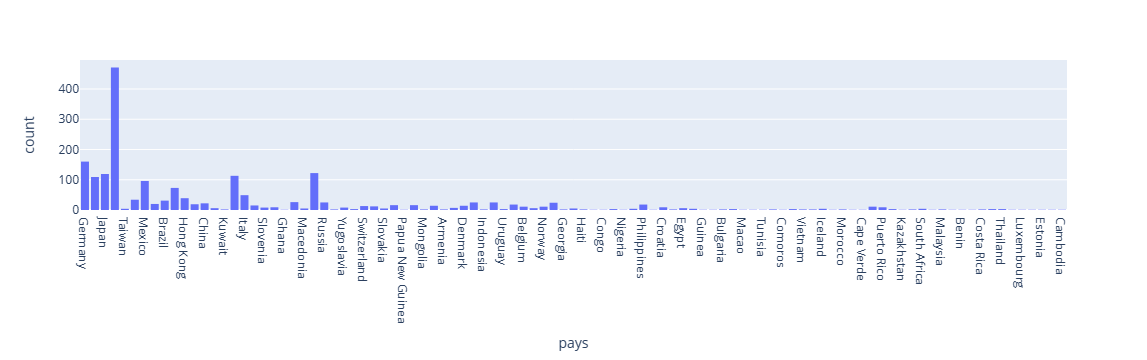

In [430]:
# The most represented countries
pays = movies_df["production_countries"]

acc_pays= []
for countries in range(len(pays)):
    acc_pays.extend(pays[countries])

colums=["pays"]
data=acc_pays

df_countries=pd.DataFrame(data=acc_pays, columns=colums)

px.histogram(df_countries, x="pays")

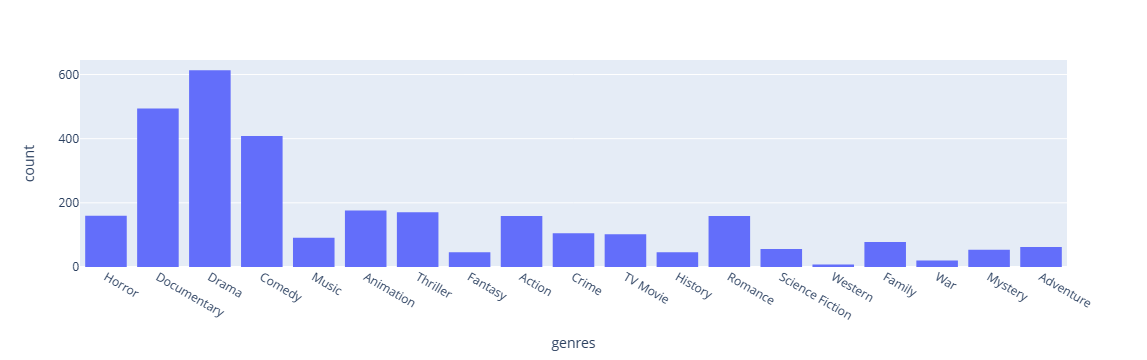

In [431]:
# The most represented genres
genres = movies_df["genres"]

acc_genres= []
for genre in range(len(genres)):
    acc_genres.extend(genres[genre])

colums=["genres"]
data=acc_genres

df_genres=pd.DataFrame(data=acc_genres, columns=colums)

px.histogram(df_genres, x="genres")

### 3 Modélisation